# Mini-Project (AI-AUG)

## Text Analysis

### Analysis of description and tweet columns

Here we will analysis the Text part of the dataset and try to extract information.<br>
We will also try to represent the text as a vector of numbers which could help us to predict via our model

In [67]:
#Importing the modules
import pandas as pd
import numpy as np
import re
import string
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

In [2]:
#Reading the csv into a DataFrame
text_df = pd.read_csv('text_twitter.csv')
#Removing the unrequired column
text_df.drop(columns=['Unnamed: 0'], inplace=True)
text_df

,description,tweet,gender
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female
...,...,...,...
18790,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",female
18791,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,male
18792,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,male
18793,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,female


**Looking a some random tweets**

In [3]:
text_df['tweet'][18000]

'As always, thanks for the speedy shipping and great products @deering_banjos _Ù÷Û#banjos #Deering\x89Û_ https://t.co/R58Ke2ROom'

In [4]:
text_df['tweet'][10]

'how are you taking care of yourself? https://t.co/OrL9u1P8YI #fitfluential'

In [5]:
text_df['tweet'][1800]

'hoes go out n be on snapchat the whole time _Ù÷©_Ù÷©. hoe put ya prim up n get chose'

In [6]:
#Looking at the distribution of the target variable
text_df['gender'].value_counts()

female    6685
male      6173
brand     5937
Name: gender, dtype: int64

After going through the dataset we came to know that the tweets contains **links**, **tags**, and many more unwanted symbols which we need to remove.

In [8]:
#After going through the text we can come up with some regex for cleaning
def regex_cleaning(sentence):
    s = str(sentence)                      #changing into str, for safety
    s = s.lower()                              #converting the sentence into lowercase
    
    #Removing all the extra symbols we will use these regex
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    
    #Removing all the links
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

#Removing all the stopwords
#Here we also check for punctuation (if any are left behind by regex)
def stopword_punctuation_cleaning(sentence):
    tokens = word_tokenize(sentence)                      #Tokenizing the sentence
    stopwords_ = set(stopwords.words('english'))    #Making a set of all stopwords of english
    punctuations =  list(string.punctuation)               #Making a list of all punctuations
    words = []
    #Loop goes through all the tokens and include those which are not stopwords or punctuation
    for token in tokens:
        if token not in punctuations:
            if token not in stopwords_:
                words.append(token)
    return words

#This function converts all the words to its root word
def stemming(words):
    ps = PorterStemmer()                  #Using Porter's Stemming method provided in nltk package
    stemmed_words = []
    #Loop goes through all the words and convert it to its base/root word
    for word in words:
        stemmed_words.append(ps.stem(word))
    return stemmed_words

In [9]:
#This is a function that call all the above functions in a sequence so that cleaning can be performed efficiently
def cleaning(sentence):
    s = regex_cleaning(sentence)
    words = stopword_punctuation_cleaning(s)
    stemmed_words = stemming(words)
    return stemmed_words

In [10]:
#Adding two columns which contains a list of cleaned words
text_df['tweet_words'] = text_df['tweet'].apply(cleaning)
text_df['desc_words'] = text_df['description'].apply(cleaning)

In [11]:
text_df.sample(10)

,description,tweet,gender,tweet_words,desc_words
8272,Student (http://t.co/In7vBJVt1H in Civil Engin...,Bajrangi Bhaijaan is the No. 1 Bollywood movie...,male,"[bajrangi, bhaijaan, bollywood, movi, imdb, é,...","[student, http, invbjvth, civil, engin, é, hug..."
5953,I can do all things through Him who gives me s...,If Glen does really die on the Walking Dead I'...,female,"[glen, realli, die, walk, dead, done, even, th...","[thing, give, strength]"
13709,MR_üÛ¢ ë£ë£ë£,Love when the wifi and lte just both fail to f...,female,"[love, wifi, lte, fail, function, properli, ùªä]","[mr, ü, û, ë, ë, ë]"
6791,QTPoC Mental Health Initiative creates space f...,"""PrEP needs to reach the most at-risk people.""...",brand,"[prep, need, reach, risk, peopl, black, gay, m...","[qtpoc, mental, health, initi, creat, space, m..."
10090,Û¢Ï¤ louisandharry look at each other the sa...,Hi @Harry_Styles _Ù÷\n@sparksflylarry 's birt...,female,"[hi, harrystyl, ù, sparksflylarri, birthday, t...","[û, ï, louisandharri, look, way, look, mcdonal..."
3022,I've had this feeling of higher purpose my ent...,#WhiteGenocide is the idea that diversity will...,male,"[whitegenocid, idea, divers, lead, white, peop...","[feel, higher, purpos, entir, life]"
14731,Fucc you and your feelings .,Dress it up and make it real for me .,female,"[dress, make, real]","[fucc, feel]"
7342,NaN,Data at Risk Series: Diving Into the #FinanceI...,male,"[data, risk, seri, dive, financeindustri, cybe...",[nan]
8938,and i am whatever i am if i wasnt then why wou...,Wounds heal but scars remain the same well wha...,female,"[wound, heal, scar, remain, well, open, bleed,...","[whatev, wasnt, would, say, pharmacist, senior..."
15438,Coffee addicted owner of @KBruComm: #motorspor...,Happy 10th birthday to @radiolemans @specutain...,female,"[happi, th, birthday, radioleman, specutain, t...","[ffee, addict, owner, kbrumm, motorsport, publ..."


As we have cleaned all the text columns so now we can remove them.

In [12]:
cleaned_text_df = text_df.drop(columns = ['description', 'tweet'])

In [13]:
#Making three Dataframe for Gender
Male = cleaned_text_df[cleaned_text_df['gender'] == 'male']
Female = cleaned_text_df[cleaned_text_df['gender'] == 'female']
Brand = cleaned_text_df[cleaned_text_df['gender'] == 'brand']

In [30]:
# Function used for plotting wordclouds
def plotting_wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    
    #making a new sentence joining all the tweets
    tweet_senc = []
    for tweet in dataframe['tweet_words']:
        tweet_senc += tweet
    tweet_senc = " ".join(tweet_senc)
    
    #making a new sentence joining all the description
    desc_senc = []
    for desc in dataframe['desc_words']:
        desc_senc += desc
    desc_senc = " ".join(desc_senc)
    
    #plotting wordcloud for tweet and description
    wordcloud1 = WordCloud(width = 1000, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(tweet_senc)
    wordcloud2 = WordCloud(width = 1000, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(desc_senc)
    
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    
    ax1.imshow(wordcloud1)
    ax1.set_title('Tweet Words')
    
    ax2.imshow(wordcloud2)
    ax2.set_title('Description Words')

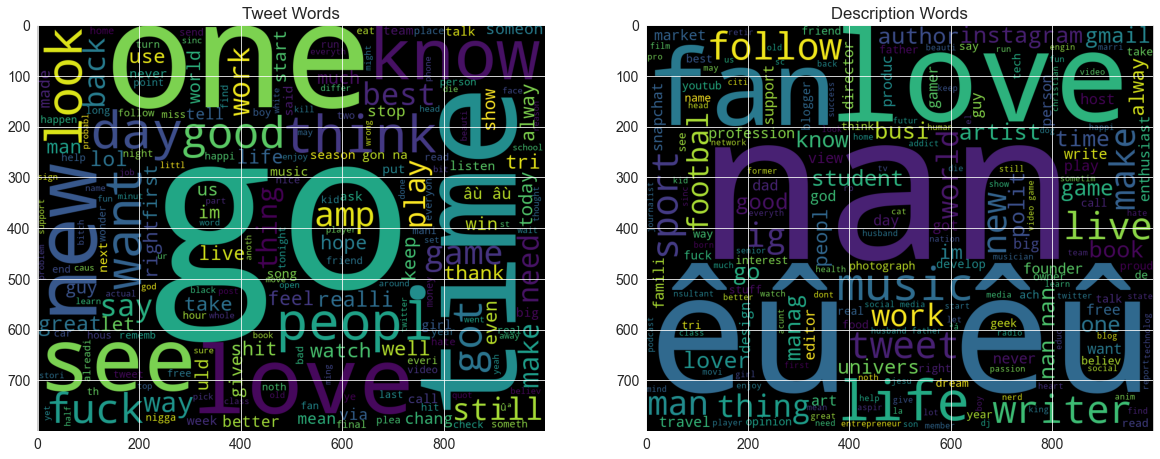

In [31]:
#Plotting wordcloud for Male
plotting_wordcloud(Male)

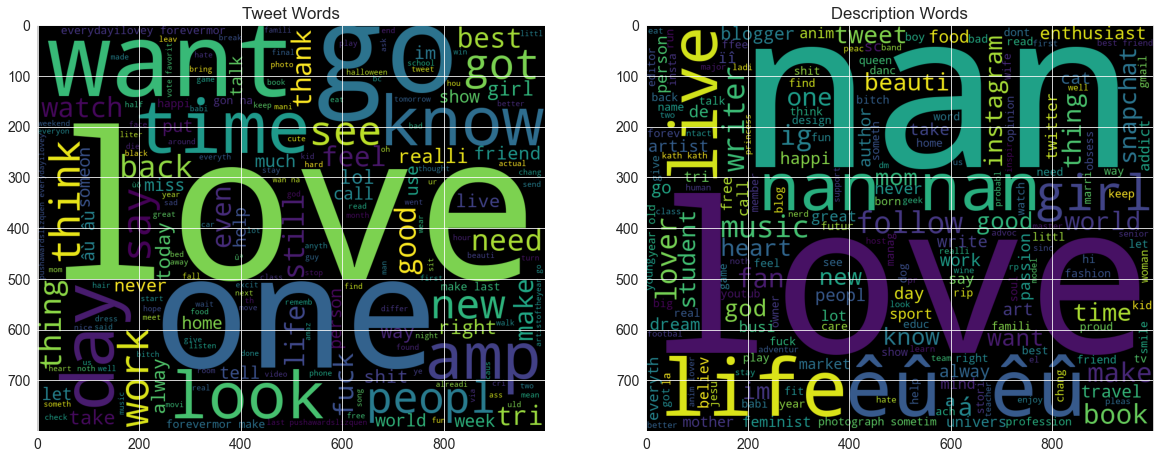

In [32]:
#Plotting wordcloud for Female
plotting_wordcloud(Female)

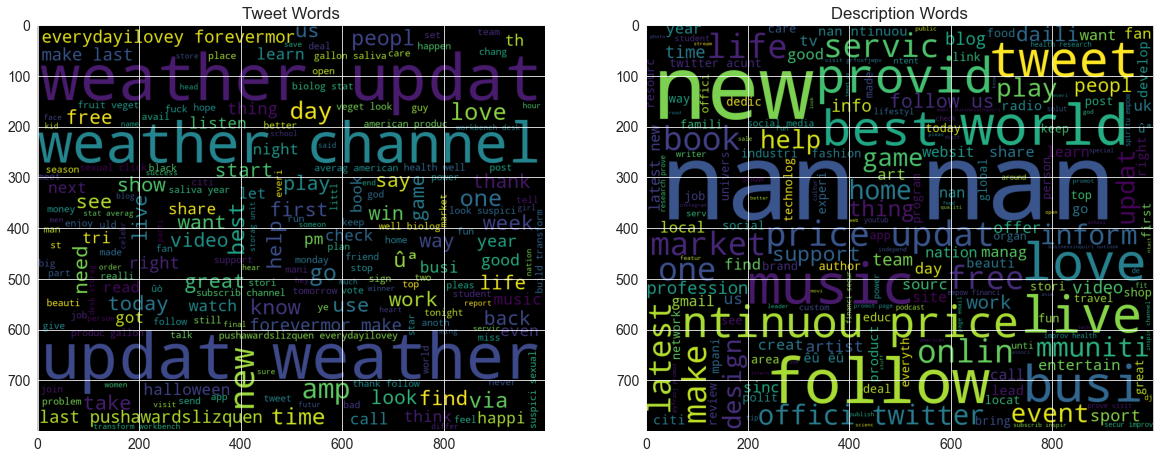

In [33]:
#Plotting wordcloud for Brand
plotting_wordcloud(Brand)

### Converting the text into a numerical value

**To perform ths task I have used a formula i.e.,**<br>

$term\_frequency = \frac{Number\_of\_times\_the\_specific\_word\_appear\_in\_particular\_gender}{Total\_nunber\_of\_words\_in\_that\_gender}$ <br>

$inverse\_doc\_frequency = \frac{Total\_number\_of\_documnets\_i.e.,\_18795}{Total\_number\_of\_times\_the\_word\_appeared\_in\_all\_the\_documents}$ <br>

$cost\_of\_each\_word = term\_frequency \times \ln(inverse\_doc\_frequency)$<br>

**To calculate the cost of the whole sentence I used:** $\displaystyle \sum_{all\_words} cost\_of\_each\_word$

In [40]:
# Checking the shape of the dataframe
cleaned_text_df.shape

(18795, 3)

In [39]:
cleaned_text_df.sample(5)

,gender,tweet_words,desc_words
3209,male,"[lol, project, whose, roi, isnt, feasibl, mwau...","[debat, equal, other, teach]"
419,brand,"[mycgbhefi, one, greatest, unsolv, mysteri, ti...","[book, promot, amazon, bestsel, campaign, soci..."
9332,brand,"[heidilynn, best, part, pet, know, feel, bette...","[music, life, sound, like, express, spoken, mu..."
11221,female,"[smell, sight, fall, carri, away, mani, place,...","[toni, sanchez, toneloc, live, life, love, har..."
1875,male,"[struggleù, qyeenxbep]",[love]


In [35]:
Male.head()

,gender,tweet_words,desc_words
0,male,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]"
1,male,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]"
2,male,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]"
3,male,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki..."
7,male,"[gala, bingo, club, bought, å, uk, largest, hi...","[secret, get, ahead, get, start]"


In [36]:
Female.head()

,gender,tweet_words,desc_words
4,female,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,..."
5,female,"[ive, seen, peopl, train, lamp, chair, tv, etc...",[know]
8,female,"[aphmau, pic, defin, mcd, fangirl, fanboy, mcd...","[pll, fan, crazi, mcd, ramen, bae]"
9,female,"[evieladi, love, tree, year, never, seen, gorg...","[renaiss, art, historian, univers, nottingham,..."
12,female,"[put, ass, line, repay]","[senior, xi, xii, mmxiv]"


In [37]:
Brand.head()

,gender,tweet_words,desc_words
6,brand,"[bpackengin, thank, patienc, take, care, issu]","[global, marketplac, imag, video, music, share..."
10,brand,"[take, care, orlupyi, fitfluenti]","[clean, food, tast, great, provid, energi, nut..."
11,brand,"[mtg, deal, x, rank, magic, seventh, one, prio...","[highli, extraordinari, auction]"
13,brand,"[zsbwuugd, nation, talk, wednesday, gop, debat...","[join, fastest, blog, network, onlin, today, h..."
25,brand,"[beauti, religion, teach, love, other, love, i...","[question, islam, would, like, answer, visit, ..."


In [41]:
#Function to get a list of all words present in the provided column col of the dataframe df
def total_words(df, col):
    total_words = []
    for tweet in df[col]:
        total_words += tweet
    return total_words

In [95]:
Male_tweet_words = pd.Series(total_words(Male, 'tweet_words')).value_counts()
Female_tweet_words = pd.Series(total_words(Female, 'tweet_words')).value_counts()
Brand_tweet_words = pd.Series(total_words(Brand, 'tweet_words')).value_counts()

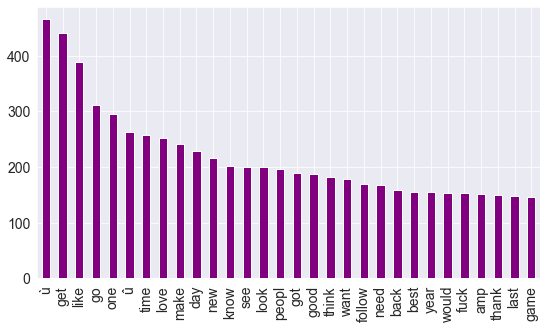

In [96]:
#Plotting Top 30 male words of tweets
Male_tweet_words[0:30].plot(kind='bar', stacked=True, color='purple')

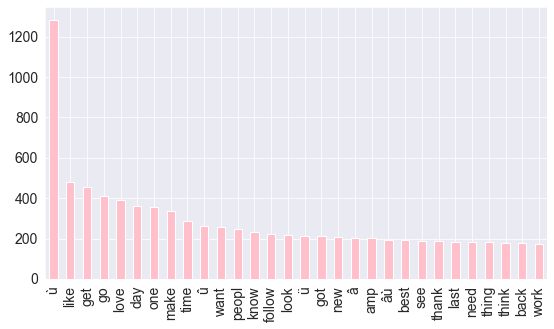

In [97]:
#Plotting Top 30 female words of tweets
Female_tweet_words[0:30].plot(kind='bar', stacked=True, color='pink')

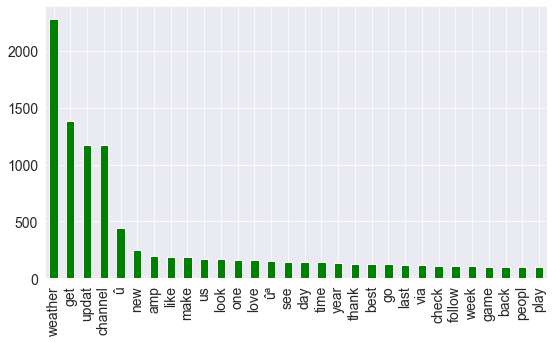

In [98]:
#Plotting Top 30 brand words of tweets
Brand_tweet_words[0:30].plot(kind='bar', stacked=True, color='green')

In [99]:
Male_desc_words = pd.Series(total_words(Male, 'desc_words')).value_counts()
Female_desc_words = pd.Series(total_words(Female, 'desc_words')).value_counts()
Brand_desc_words = pd.Series(total_words(Brand, 'desc_words')).value_counts()

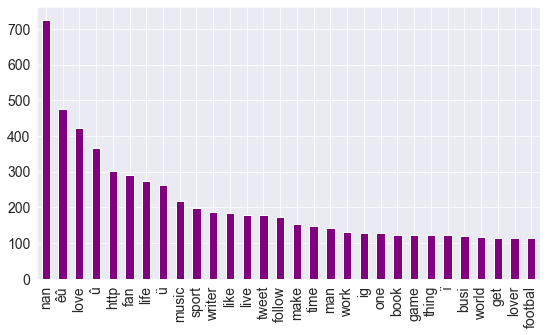

In [100]:
#Plotting Top 30 male words of description
Male_desc_words[0:30].plot(kind='bar', stacked=True, color='purple')

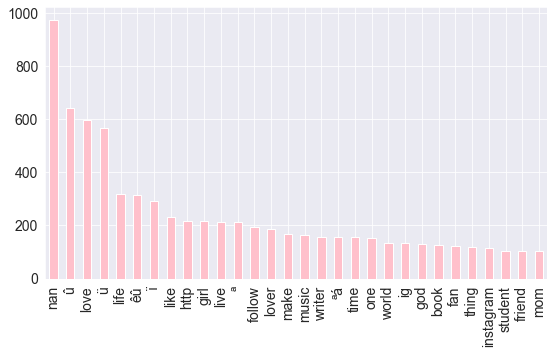

In [101]:
#Plotting Top 30 female words of description
Female_desc_words[0:30].plot(kind='bar', stacked=True, color='pink')

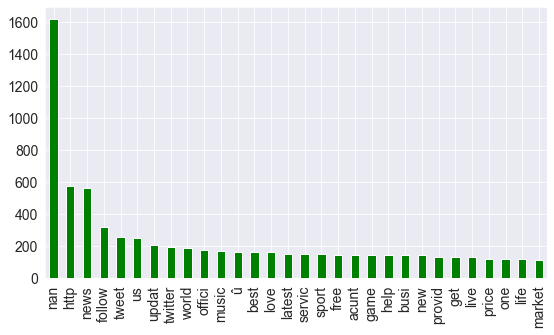

In [102]:
#Plotting Top 30 brand words of description
Brand_desc_words[0:30].plot(kind='bar', stacked=True, color='green')

#### Below I have used the formula calculate numerical values

In [103]:
Male_tweet_dict = dict(Male_tweet_words)
Female_tweet_dict = dict(Female_tweet_words)
Brand_tweet_dict = dict(Brand_tweet_words)
Male_desc_dict = dict(Male_desc_words)
Female_desc_dict = dict(Female_desc_words)
Brand_desc_dict = dict(Brand_desc_words)

In [104]:
Ttotalwords = total_words(cleaned_text_df, 'tweet_words')
Dtotalwords = total_words(cleaned_text_df, 'desc_words')
T_dict = dict(pd.Series(Ttotalwords).value_counts())
D_dict = dict(pd.Series(Dtotalwords).value_counts())

In [105]:
def total(dictonary):
    s=0
    for val in dictonary.values():
        s = s + val
    return s

In [106]:
Ttotalmale = total(Male_tweet_dict)
Ttotalfemale = total(Female_tweet_dict)
Ttotalbrand = total(Brand_tweet_dict)

Dtotalmale = total(Male_desc_dict)
Dtotalfemale = total(Female_desc_dict)
Dtotalbrand = total(Brand_desc_dict)

In [107]:
def ScoreTM(word):
    tf = Male_tweet_dict.get(word, 0) / Ttotalmale
    idf = math.log(cleaned_text_df.shape[0] / T_dict.get(word, 0))
    return tf * idf
def male_tweet_tf_idf(tweet):
    score = 0
    for word in tweet:
        score += ScoreTM(word)
    return score

In [108]:
cleaned_text_df['Male_T_Score'] = cleaned_text_df['tweet_words'].apply(male_tweet_tf_idf)
cleaned_text_df.head()

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score
0,male,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]",0.011182,0.000000,0.00000,0.0,0.0
1,male,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]",0.051138,0.248544,0.18674,0.0,0.0
2,male,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]",0.043089,0.000000,0.00000,0.0,0.0
3,male,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki...",0.038179,0.164207,0.11061,0.0,0.0
4,female,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,...",0.053490,0.685962,0.00000,0.0,0.0


In [109]:
def ScoreTF(word):
    tf = Female_tweet_dict.get(word, 0) / Ttotalfemale
    idf = math.log(cleaned_text_df.shape[0] / T_dict.get(word, 0))
    return tf * idf
def female_tweet_tf_idf(tweet):
    score = 0
    for word in tweet:
        score += ScoreTF(word)
    return score

In [110]:
cleaned_text_df['Female_T_Score'] = cleaned_text_df['tweet_words'].apply(female_tweet_tf_idf)
cleaned_text_df.head()

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score
0,male,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]",0.011182,0.009599,0.00000,0.0,0.0
1,male,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]",0.051138,0.058385,0.18674,0.0,0.0
2,male,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]",0.043089,0.042259,0.00000,0.0,0.0
3,male,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki...",0.038179,0.036107,0.11061,0.0,0.0
4,female,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,...",0.053490,0.119514,0.00000,0.0,0.0


In [111]:
def ScoreTB(word):
    tf = Brand_tweet_dict.get(word, 0) / Ttotalbrand
    idf = math.log(cleaned_text_df.shape[0] / T_dict.get(word, 0))
    return tf * idf
def brand_tweet_tf_idf(tweet):
    score = 0
    for word in tweet:
        score += ScoreTB(word)
    return score

In [112]:
cleaned_text_df['Brand_T_Score'] = cleaned_text_df['tweet_words'].apply(brand_tweet_tf_idf)
cleaned_text_df.head()

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score
0,male,"[robbi, e, respond, critic, win, eddi, edward,...","[sing, rhythm]",0.011182,0.009599,0.010630,0.0,0.0
1,male,"[ûïit, felt, like, friend, live, stori, û, arn...","[author, novel, fill, famili, drama, romanc]",0.051138,0.058385,0.046946,0.0,0.0
2,male,"[absolut, ador, loui, start, song, hit, hard, ...","[loui, whine, squeal]",0.043089,0.042259,0.020020,0.0,0.0
3,male,"[hi, jordanspieth, look, url, use, ifttt, typi...","[mobil, guy, er, shazam, googl, kleiner, perki...",0.038179,0.036107,0.030881,0.0,0.0
4,female,"[watch, neighbour, sky, catch, neighb, xxx, ù,...","[ricki, wilson, best, frontman, kaiser, chief,...",0.053490,0.119514,0.018620,0.0,0.0


In [113]:
def ScoreDM(word):
    tf = Male_desc_dict.get(word, 0) / Dtotalmale
    idf = math.log(cleaned_text_df.shape[0] / D_dict.get(word, 0))
    return tf * idf
def male_desc_tf_idf(desc):
    score = 0
    for word in desc:
        score += ScoreDM(word)
    return score

In [114]:
cleaned_text_df['Male_D_Score'] = cleaned_text_df['desc_words'].apply(male_desc_tf_idf)
cleaned_text_df.sample(5)

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score
18649,female,"[natashalnei, quot, lulitaann, pffftsh, gurrrl...","[ûê, û, ltx, nativ, ù, earthl, music, ª, len, ...",0.073547,0.144276,0.019302,0.048525,0.438999
17975,female,"[jhaywardbenz, hour, afternoon, love, late, au...","[princess, warrior, call, furiosa, unapologet,...",0.031314,0.041164,0.019416,0.052854,0.295090
6275,brand,"[get, weather, updat, weather, channel]",[nan],0.018141,0.018327,0.346202,0.023776,0.230839
3633,female,"[feel, aftermath, workout, yesterday, hurt, good]","[passion, person, wear, ü, sleev, footbal, che...",0.024444,0.027448,0.009478,0.061154,0.407391
4025,brand,"[psychologist, say, lore, best, altern, medit,...","[techgood, socialgood, wisdom, linguist, ai, s...",0.020772,0.023599,0.015396,0.004759,0.000000


In [115]:
def ScoreDF(word):
    tf = Female_desc_dict.get(word, 0) / Dtotalfemale
    idf = math.log(cleaned_text_df.shape[0] / D_dict.get(word, 0))
    return tf * idf
def female_desc_tf_idf(desc):
    score = 0
    for word in desc:
        score += ScoreDF(word)
    return score

In [116]:
cleaned_text_df['Female_D_Score'] = cleaned_text_df['desc_words'].apply(female_desc_tf_idf)
cleaned_text_df.sample(5)

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score
1183,male,"[alway, got, ta, prepar, twitter, video, start...","[never, gon, lose]",0.041293,0.039005,0.021533,0.011603,0.009681
2860,female,"[everydaydayilovey, forevermor, ride, edg, sea...",[nan],0.020806,0.034102,0.041926,0.023776,0.034654
17802,female,"[microglia, play, signific, role, brain, devel...","[immun, homeostasi, balanc, essenti, heal, rev...",0.011960,0.008250,0.009328,0.018602,0.018736
16490,female,"[aye, ok, niall, packet, quaver, half, tub, ic...","[garybarlow, mark, smell, sunshin, happi, laug...",0.062216,0.073205,0.031183,0.010058,0.019776
9896,brand,"[whenev, old, friend, back, home, tri, annoy, ...","[art, voic, act, mputer, engin, novel, film, g...",0.069059,0.092400,0.043870,0.053883,0.044269


In [117]:
def ScoreDB(word):
    tf = Brand_desc_dict.get(word, 0) / Dtotalbrand
    idf = math.log(cleaned_text_df.shape[0] / D_dict.get(word, 0))
    return tf * idf
def brand_desc_tf_idf(desc):
    score = 0
    for word in desc:
        score += ScoreDB(word)
    return score

In [118]:
cleaned_text_df['Brand_D_Score'] = cleaned_text_df['desc_words'].apply(brand_desc_tf_idf)
cleaned_text_df.sample(5)

,gender,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
16372,brand,"[visit, essgfuzaw, chat, us, jesuschristkid, j...","[question, islam, would, like, find, answer, v...",0.016666,0.013990,0.025560,0.026217,0.033728,0.071344
46,male,"[andyrobsontip, cardiff, drew, match, goal, so...","[live, life, top, food, chain]",0.020162,0.016309,0.010161,0.036624,0.046386,0.030338
14643,female,"[ashushura, hyapper, hate, nfuse, mess, in, wo...","[hey, meghan, year, old, turbonerd, like, slot...",0.014750,0.022260,0.008492,0.053856,0.057943,0.037634
2267,male,"[subdued, cultur, futur, primros, pro, unfool,...",[nan],0.007690,0.003271,0.006420,0.023776,0.034654,0.059253
10517,female,"[serrena, washington, serrena, seizur, disord,...","[hugginzbyangel, moderndaymissionari, wrapping...",0.032091,0.048316,0.023835,0.000000,0.000806,0.000000


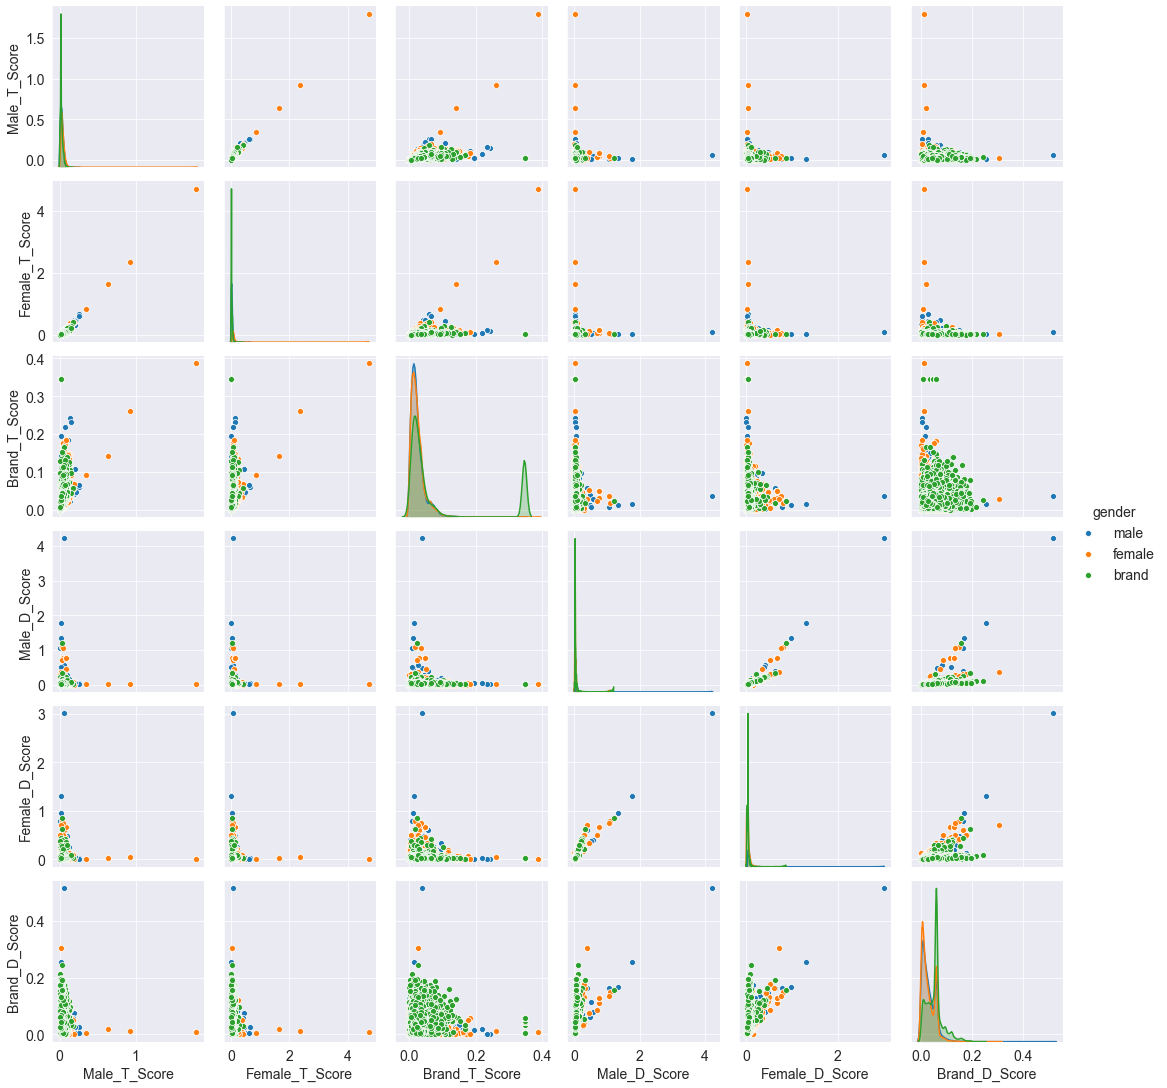

In [119]:
#Plotted a pairplot for newly added columns
sns.pairplot(cleaned_text_df[['gender', 'Male_T_Score', 'Female_T_Score', 'Brand_T_Score', 'Male_D_Score', 'Female_D_Score', 'Brand_D_Score']], hue='gender')

In [120]:
#Saving the analysied dataframe in csv
cleaned_text_df.to_csv('text_analysised.csv')